<a href="https://colab.research.google.com/github/NikunjTyagi26/nikunjtyagiportfolio/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset into a DataFrame
file_path = '/content/drive/My Drive/finalvala-5.csv'  # Update with your correct path
df = pd.read_csv(file_path)

# Check the first few rows of the dataset
print("First five rows of the dataset:")
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First five rows of the dataset:
     ID family history (yes, no) sex (f,m)  PANSS-Positive (score)        p1  \
0   125                       no         m               26.667018  4.948646   
1    81                       no         m               25.000000  5.000000   
2   333                       no         m               26.000000  4.000000   
3  1685                      yes         f               25.000000  4.000000   
4    27                       no         m               17.000000  5.000000   

         p2        p3        p4        p5        p6  ...   g9  g10  g11  g12  \
0  4.714738  3.954977  3.383046  2.425809  4.081252  ...  1.0  3.0  5.0  6.0   
1  5.000000  5.000000  3.000000  2.000000  2.000000  ...  5.0  4.0  3.0  5.0   
2  3.000000  3.000000  4.000000  4.000000  4.000000  ...  4.0  3.0  4.0  4.0   
3  5.000000  3.000000  5.000000  2.000

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Preprocessing data
# Convert 'family history' and 'sex' to numerical values using LabelEncoder
label_encoder = LabelEncoder()
df['family_history'] = label_encoder.fit_transform(df['family history (yes, no)'])
df['sex'] = label_encoder.fit_transform(df['sex (f,m)'])

# Create target variable based on PANSS score
def categorize_severity(panss_score):
    if panss_score >= 115:
        return 2  # Severe
    elif panss_score >= 76:
        return 1  # Moderate
    else:
        return 0  # Mild

df['severity'] = df['PANSS total (score)'].apply(categorize_severity)

# Features and target
X = df[['PANSS total (score)', 'family_history', 'sex']]
y = df['severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the neural network
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, y_train)

# Evaluate the model
y_pred = mlp.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00       302
           2       1.00      1.00      1.00        73

    accuracy                           1.00       602
   macro avg       1.00      1.00      1.00       602
weighted avg       1.00      1.00      1.00       602



In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold

# Preprocessing data
# Convert 'family history' and 'sex' to numerical values using LabelEncoder
label_encoder = LabelEncoder()
df['family_history'] = label_encoder.fit_transform(df['family history (yes, no)'])
df['sex'] = label_encoder.fit_transform(df['sex (f,m)'])

# Create target variable based on PANSS score
def categorize_severity(panss_score):
    if panss_score >= 115:
        return 2  # Severe
    elif panss_score >= 76:
        return 1  # Moderate
    else:
        return 0  # Mild

df['severity'] = df['PANSS total (score)'].apply(categorize_severity)

# Features and target
X = df[['PANSS total (score)', 'family_history', 'sex']]
y = df['severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the neural network with L2 regularization (alpha)
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, activation='relu', solver='adam', random_state=42, alpha=0.001, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)

# Train the model
mlp.fit(X_train, y_train)

# Evaluate the model
y_pred = mlp.predict(X_test)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Cross-validation to evaluate performance across different subsets
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(mlp, X, y, cv=cv, scoring='accuracy')
print("Cross-validation accuracy scores: ", cross_val_scores)
print("Mean accuracy from cross-validation: ", cross_val_scores.mean())


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00       302
           2       1.00      0.99      0.99        73

    accuracy                           1.00       602
   macro avg       1.00      1.00      1.00       602
weighted avg       1.00      1.00      1.00       602

Confusion Matrix:
[[227   0   0]
 [  0 302   0]
 [  0   1  72]]
Cross-validation accuracy scores:  [0.96013289 0.59400998 0.9750416  0.97171381 0.97836938]
Mean accuracy from cross-validation:  0.8958535331479649


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model again with resampled data
mlp.fit(X_train, y_train)

# Evaluate the model
y_pred = mlp.predict(X_test)

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       305
           1       1.00      0.96      0.98       316
           2       0.98      1.00      0.99       293

    accuracy                           0.99       914
   macro avg       0.99      0.99      0.99       914
weighted avg       0.99      0.99      0.99       914

Confusion Matrix:
[[305   0   0]
 [  6 303   7]
 [  0   0 293]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),  # Dropout with a rate of 50%
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5838 - loss: 0.8496 - val_accuracy: 0.8578 - val_loss: 0.4079
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8672 - loss: 0.3891 - val_accuracy: 0.9442 - val_loss: 0.2027
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9147 - loss: 0.2399 - val_accuracy: 0.9584 - val_loss: 0.1422
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9282 - loss: 0.1889 - val_accuracy: 0.9650 - val_loss: 0.1104
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9413 - loss: 0.1588 - val_accuracy: 0.9661 - val_loss: 0.0939
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9441 - loss: 0.1483 - val_accuracy: 0.9792 - val_loss: 0.0817
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9534 - loss: 0.1246 - val_accuracy: 0.9803 - val_loss: 0.0771
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9584 - loss: 0.1165 - val_accuracy: 0.9628 - val_

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['family history (yes, no)'] = le.fit_transform(df['family history (yes, no)'])
df['sex (f,m)'] = le.fit_transform(df['sex (f,m)'])


In [ ]:
from tensorflow.keras.optimizers import SGD

# Use a high learning rate with SGD (Stochastic Gradient Descent)
model.compile(optimizer=SGD(learning_rate=0.5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert the labels to numerical values if they are not already
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the model with class weights
# Train the model without class weights
model.fit(X_train, y_train_encoded, epochs=50, batch_size=32)  # No class_weight parameter


# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test accuracy: {accuracy}")


Epoch 1/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8435 - loss: 1.2454
Epoch 2/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9273 - loss: 0.1882
Epoch 3/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9600 - loss: 0.1034
Epoch 4/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9583 - loss: 0.1093
Epoch 5/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9572 - loss: 0.1009
Epoch 6/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9566 - loss: 0.1086
Epoch 7/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9510 - loss: 0.2373
Epoch 8/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9678 - loss: 0.0777
Epoch 9/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9653 - loss: 0.0882
Epoch 10/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9681 - loss: 0.0746
Epoch 11/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9758 - loss: 0.0634
Epoch 12/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


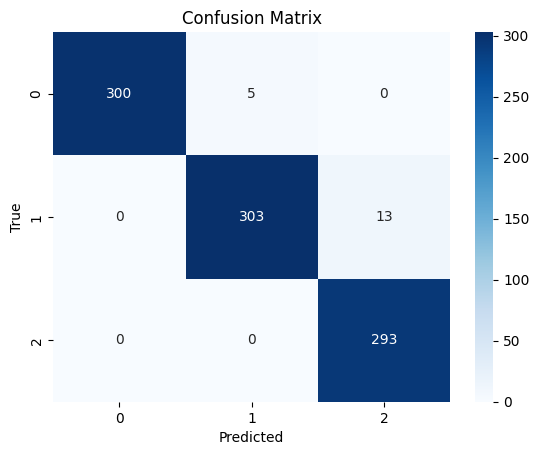

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_classes)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print(classification_report(y_test_encoded, y_pred_classes))


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       305
           1       0.98      0.96      0.97       316
           2       0.96      1.00      0.98       293

    accuracy                           0.98       914
   macro avg       0.98      0.98      0.98       914
weighted avg       0.98      0.98      0.98       914



29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


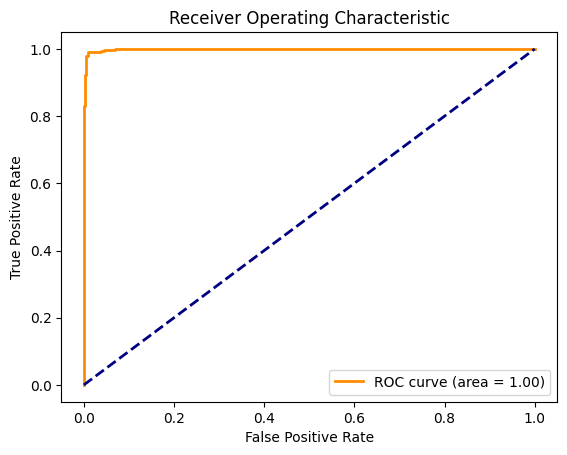

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multiclass classification
y_test_bin = label_binarize(y_test_encoded, classes=[0, 1, 2])  # Change based on your classes
y_pred_prob = model.predict(X_test)

# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import cohen_kappa_score

kappa_score = cohen_kappa_score(y_test_encoded, y_pred_classes)
print("Cohen's Kappa Score:", kappa_score)


Cohen's Kappa Score: 0.970458422366271


In [ ]:
from sklearn.metrics import log_loss

# Calculate Log Loss
log_loss_value = log_loss(y_test_encoded, y_pred_prob)
print("Log Loss:", log_loss_value)


Log Loss: 0.06219807453711811
